<a href="https://colab.research.google.com/github/jhopan/TA3/blob/main/TA_3_Jhosua_Panjaitan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [1]:
import sys
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data= pd.read_csv('/content/drive/My Drive/Data Collab/ai4i2020.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [41]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


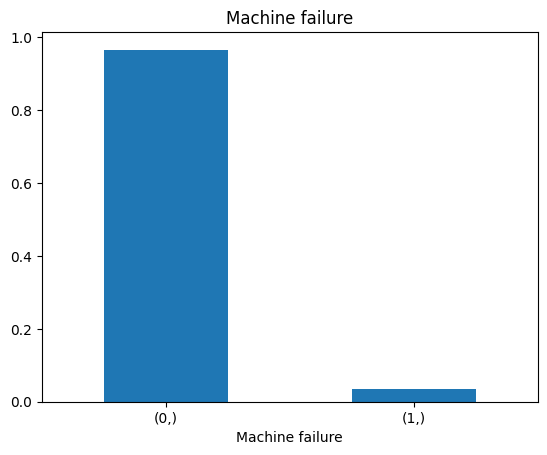

Machine failure
0                  96.61
1                   3.39
Name: proportion, dtype: float64


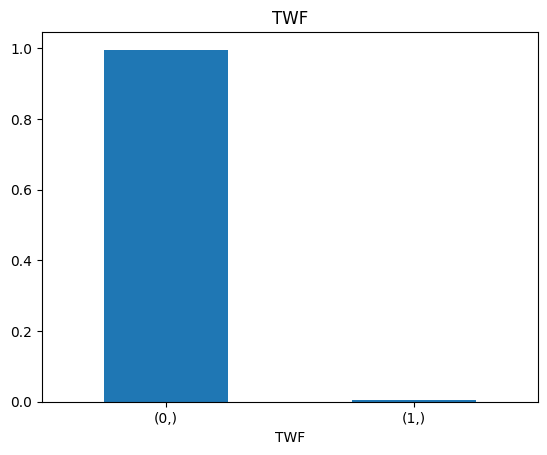

TWF
0      99.54
1       0.46
Name: proportion, dtype: float64


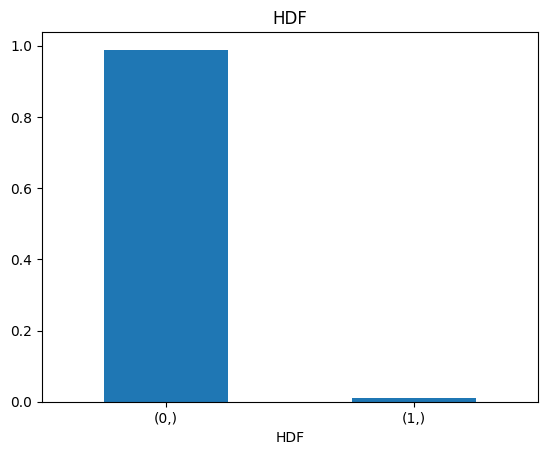

HDF
0      98.85
1       1.15
Name: proportion, dtype: float64


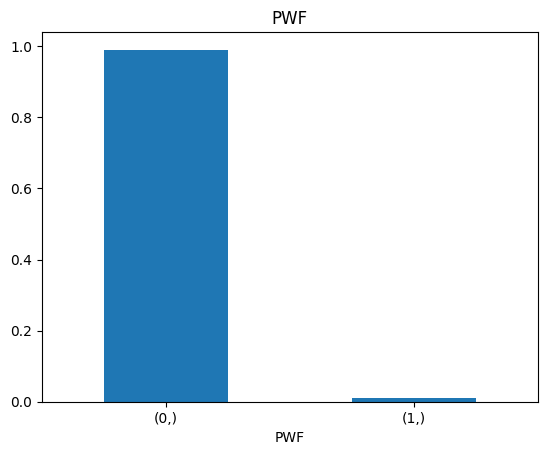

PWF
0      99.05
1       0.95
Name: proportion, dtype: float64


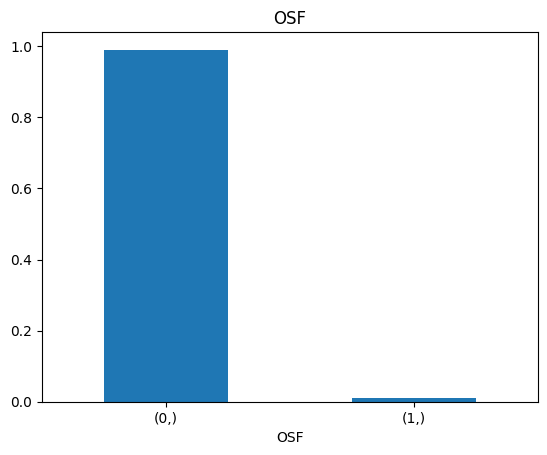

OSF
0      99.02
1       0.98
Name: proportion, dtype: float64


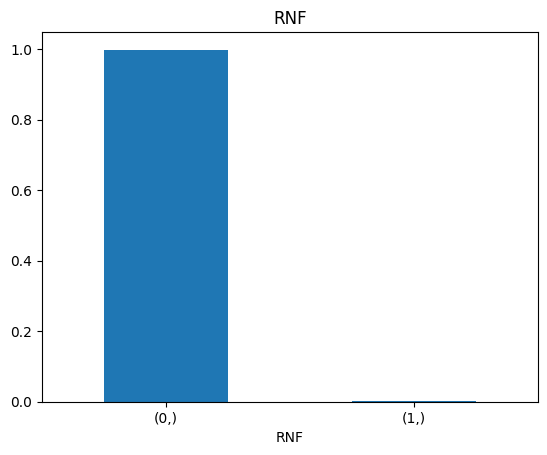

RNF
0      99.81
1       0.19
Name: proportion, dtype: float64


In [6]:
for col in data.columns[-6:]:
    col_vals = data[[col]].value_counts(normalize=True)
    col_vals.plot(kind="bar", rot=0);
    plt.title(col)
    plt.show()
    print(col_vals*100)

TWF
0    99.54
1     0.46
Name: proportion, dtype: float64


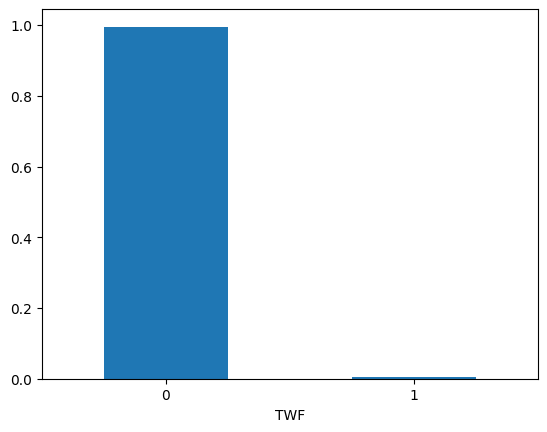

In [7]:
twf_vals = data.TWF.value_counts(normalize=True)
twf_vals.plot(kind="bar", rot=0)
print(twf_vals * 100)

In [26]:
X = data.drop(['Type','Product ID','Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',], axis=1)
y = data['TWF']

## Splitting the dataset into the Training set and Test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
print(X_train)

[[ 1.4692775  -0.85406604 -0.60958879  0.42763418 -0.89269644  1.37503539]
 [-1.19499359 -0.90401361 -1.08052803 -0.83494457  1.38218727  0.45762016]
 [-1.15724427 -0.90401361 -1.48419023 -0.05967692 -0.89269644  1.35921788]
 ...
 [ 0.13108128  1.39357475  1.54327629 -0.30887009  0.72076734  1.81792549]
 [-1.43776677 -1.95291265 -2.08968354  0.01231222 -0.74237372 -1.18740025]
 [ 0.78217054  0.09493785  0.26501265  1.49085839 -1.42383669 -1.15576524]]


In [29]:
print(y_train)

9254    0
1561    0
1670    0
6087    0
6669    0
       ..
5734    0
5191    0
5390    0
860     0
7270    0
Name: TWF, Length: 8000, dtype: int64


In [30]:
print(X_test)

[[ 4.29612631e-01  3.94623289e-01  1.97735612e-01 -4.30065887e-03
  -3.91620730e-01  1.42248790e+00]
 [-1.13423515e-01  1.79315534e+00  1.20689112e+00 -6.52202912e-01
   4.80251001e-01 -1.11809981e-01]
 [-1.13611850e+00 -8.54066042e-01 -1.41691320e+00 -2.97794842e-01
   1.99648605e-01  1.41270082e-01]
 ...
 [ 9.84077471e-01  1.44885423e-01  1.13961409e+00 -1.22811603e+00
   1.65276816e+00 -1.59865535e+00]
 [-1.35638061e+00 -1.55333207e+00 -1.68602134e+00  6.54671101e+00
  -3.07738652e+00 -1.42466280e+00]
 [ 6.64074028e-01  4.94518436e-01  1.07233705e+00 -1.31671804e+00
   1.50244544e+00 -1.56702034e+00]]


In [31]:
print(y_test)

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    0
8285    0
7853    0
1095    0
6929    0
Name: TWF, Length: 2000, dtype: int64


## Feature Scaling

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
print(X_train)

       UDI  Air temperature [K]  Process temperature [K]  \
2967  2968                300.6                    309.4   
700    701                297.6                    308.8   
3481  3482                302.0                    310.9   
1621  1622                297.7                    307.6   
800    801                297.0                    307.9   
...    ...                  ...                      ...   
9225  9226                298.0                    309.1   
4859  4860                303.7                    312.4   
3264  3265                301.3                    310.1   
9845  9846                298.3                    309.1   
2732  2733                299.7                    309.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
2967                    1369         51.6               71  
700                     1683         31.6               79  
3481                    1663         31.5               81  
1621                    1844       

## Training the K-NN model on the Training set

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.00434110680757724
R^2 Score: 0.009024524366932796


## Predicting the Test set results

In [36]:
predictions=model.predict(X_test)

## Visualising the Test set results

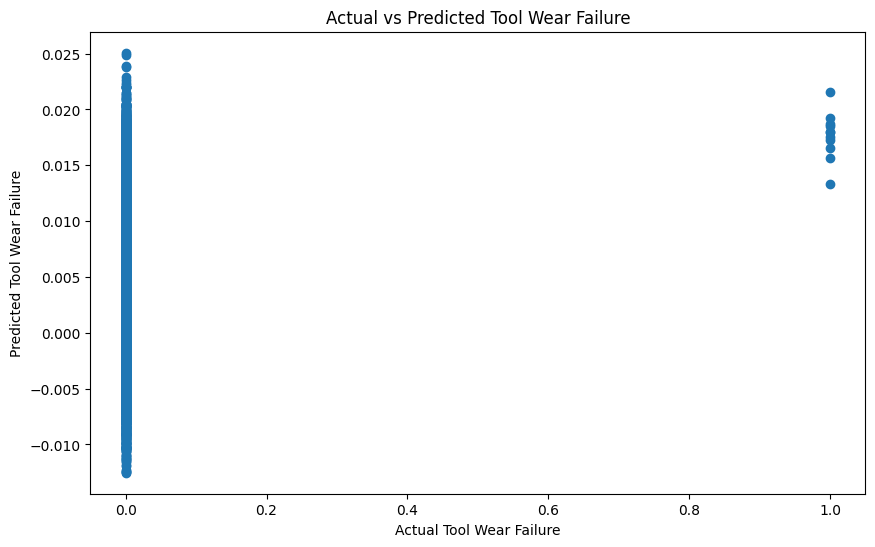

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Tool Wear Failure')
plt.ylabel('Predicted Tool Wear Failure')
plt.title('Actual vs Predicted Tool Wear Failure')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2489
           1       0.00      0.00      0.00        11

    accuracy                           1.00      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.99      1.00      0.99      2500



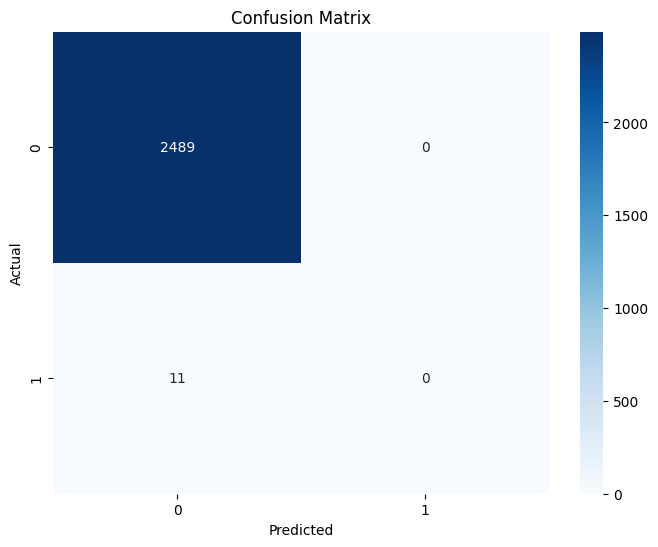

In [38]:
# Konversi y_pred ke dalam format kategorikal
y_pred_cat = np.round(y_pred)

print(classification_report(y_test, y_pred_cat))

conf_matrix = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

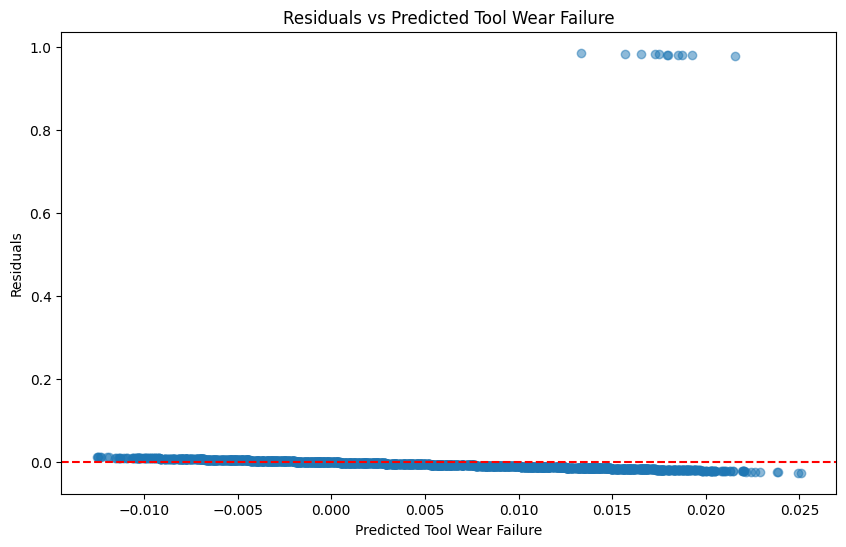

In [39]:
# Menghitung residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Tool Wear Failure')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Tool Wear Failure')
plt.show()